In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
#se definen las funciones a utilizar más adelante
def Cuadrados_minimos(x,y, err = False):
    x = np.array(x)
    y = np.array(y)
    
    N = len(x)
    Delta = N*sum(x**2)-(sum(x)**2)
    
    a1 = ((sum(x**2)*sum(y))-sum(x)*sum(x*y))/Delta
    a2 = (N*sum(x*y)-sum(x)*sum(y))/Delta
    
    if err == True:
        sigma = np.std(y)
        sigma1 = np.sqrt(sum(x**2)*sigma**2/Delta)
        sigma2 = np.sqrt(N*sigma**2/Delta)
        
        return a1, a2, sigma1, sigma2
    
    return a1, a2

def Sum_chi2(a1,a2,x,y):
    y = np.array(y)
    x = np.array(x)
    N = len(y)
    return sum((1/N)*(y - (a1 + a2*x))**2)

def find_nearest(array, value): # Defino una función que encuentre el valor más cercano a uno que yo le doy, de un vector. Esto
    # lo hago porque mi estadístico no pertenece al vector de todos los n que usé.
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

## EJERCICIO 1)A)

#### Estime el valor de la probabilidad crítica $p_{c}$ registrando los valores de $p$ para los cuales aparece el cluster percolante. Usar iteraciones de la forma $p = p + \frac{p}{2^{n}}$ con $n$ el número de la iteración si el cluster no percola y $p = p - \frac{p}{2^{n}}$ si el cluster percola. Promediar sobre diferentes realizaciones de la semilla.

Se realizaron las simulaciones de la siguiente manera:

Se definió una precisión de 20 (20 iteraciones de la forma $p \pm \frac{p}{2^{n}}$ para hallar la probabilidad crítica). En cada iteración se pobló una red con una probabilidad inicial $p = 0.5$ para una dimensión dada de la red (4, 16, 32, 64, 128). Se realizaron 20 iteraciones de precisión hasta alcanzar la probabilidad crítica (de percolación) para una red poblada con una dada semilla (durante las 20 iteraciones). Una vez completadas las 20 iteraciones de precisión sobre la probabilidad, se actualiza la semilla, se vuelve a poblar la red, se realizan las 20 iteraciones de precisión sobre $p$ hasta alcanzar nuevamente la $p_{c}$. Se repitió este proceso 27mil veces.

importamos los txt para los diferentes tamaños de redes con las probabilidades criticas resultantes de las 27mil iteraciones.

Se arma una lista L_1 con los diferentes tamaños de la red, en el orden que aparecen los filenames

Se arma un lista data_1, donde cada elemento es el array de lista de todas las probabilidades obtenidas (27mil) para una dada dimensión de red. Es una lista con 5 elementos. Cada uno de esos 5 elementos (arrays) tienen 27mil elementos.

Luego se guardan los promedios de los elementos de cada array de la lista data_1 en la lista Pc_1

Lo mismo para la desviación estandard en la lista std

Se calculan los $\sigma_{\bar{x}}$ de cada promedio y se usa como error

Se grafica

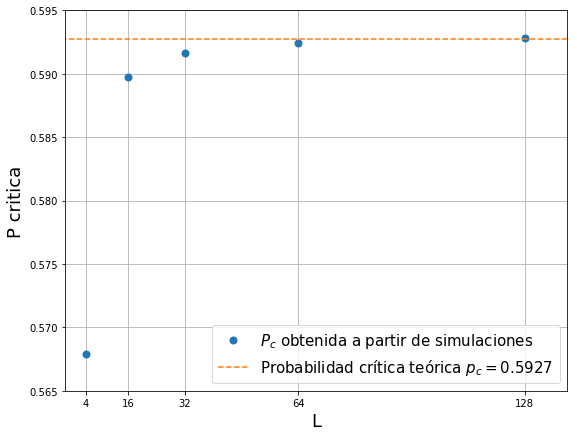

In [3]:
os.chdir(r'C:\Users\igna\Documents\GitHub\Computacional\01 - a - probabilidad critica')

filenames = sorted(glob.glob('dim_*_ps_1a.txt'))

L_1 = [128, 16, 32, 4, 64]
data_1 = []
for f in filenames:
    d = np.loadtxt(fname = f)
    data_1.append(d) # Data tiene en cada elemento el vector de ps correspondiente a cada L. ordenados como 128 - 16- 32- 4- 64

Pc_1  = []
std = []
for i in range (len(data_1)):
    p = np.mean(data_1[i])
    s = np.std(data_1[i])
    Pc_1.append(p)
    std.append(s)

#el error del valor medio es la desviación estandar dividido la raiz cuadrada del numero de datos.
err = std/np.sqrt(len(data_1[0]))
    
plt.figure(figsize = (9,7))
plt.plot(L_1,Pc_1,
         '.',
         markersize = 14,
         label = '$P_{c}$ obtenida a partir de simulaciones');

xhline = np.arange(-10,200)
yhline = np.ones(len(xhline))*0.592746050
plt.plot(xhline, yhline,
         '--',
         label = 'Probabilidad crítica teórica $p_{c} = 0.5927$')
#plt.errorbar(L_1, Pc_1, yerr = err, 
#            fmt = '.',
#            capsize = 4,
#            label = 'Error de la media')
plt.axis([-2,140, 0.565, 0.595])
plt.grid()
#plt.title('Probabilidades críticas para dimensión de la red', fontsize = 18)
plt.xlabel('L', fontsize = 18);
plt.ylabel('P critica', fontsize = 18);
plt.legend(fontsize = 15, loc = 'lower right');
plt.xticks([4, 16, 32, 64, 128]);
#plt.savefig('1AProbabilidadCritica_met1.pdf')

## Cálculo del valor del exponente crítico $\nu$

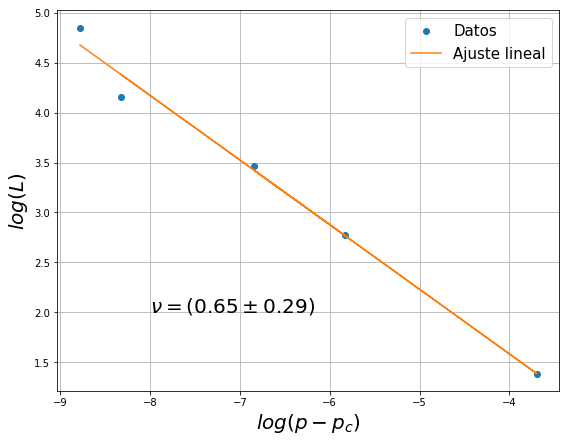

In [4]:
# Defino el vector diferencia de p's
dif_p = abs(np.array(Pc_1) - 0.5927)

# Defino los dos vectores que voy a graficar

x = np.log(dif_p)
y = np.log(L_1)

# Calculo el ajuste

a1, a2, sigma1, sigma2 = Cuadrados_minimos(x,y, err = True)


# Grafico
plt.figure(figsize = (9,7))
plt.plot(x,y,
         '.',
         markersize = 12, 
         label = 'Datos')

plt.plot(x,a1+x*a2, label = 'Ajuste lineal')

plt.xlabel('$log(p-p_c)$',fontsize = 20);
plt.ylabel('$log(L)$',fontsize = 20);
plt.legend(fontsize = 15);
plt.text(-8,2,
        r'$\nu = (%.2f \pm %.2f)$' % (-a2,sigma2),
         fontsize = 20)
plt.grid()
#plt.savefig(r'C:\Users\paula\Documents\nu.pdf')

## EJERCICIO 1)B)

#### Calcule la probabilidad crítica de aparición del cluster percolante $F(p)dp$ cuando $p \in [p, p + dp]$. Estime $p_{c}(L)$ como el valor de $p$ para el cual la red percola la mitad de las veces.

Se realizaron la simulaciones de la siguiente manera:

Para una dada dimensión de la red (4, 16, 32, 64, 128) se generaron curvas $p_{\mbox{per}}\ \mbox{vs}\ p_{\mbox{ocu}}$. Se generaron 10 curvas para cada tamaño de red.

Las curvas fueron simuladas de la siguiente manera:

Barriendo desde una probabilidad $p_{\mbox{ocu}} = 0.550$ hasta $p_{\mbox{ocu}} = 0.650$ (que por el punto anterior vimos que contiene a la probabilidad crítica) de a pasos de $dp = 10^{-3}$. Para cada probabilidad de ocupación del barrido se realizaron 1000 iteraciones poblando la red con diferentes semillas. Dentro de estas 1000 iteraciones se contaron las ocurrencias de clusters percolantes (al menos uno) y luego se calculó $p_{\mbox{per}}$ como la cantidad de clusters percolantes observados en las 1000 iteraciones, dividido por la cantidad total de iteraciones (1000). De este proceso se obtiene, para cada probabilidad de ocupación una probabilidad de percolación.

Realizando este proceso para cada tamaño de red, se obtienen 10 curvas por cada uno y luego se las grafica superpuestas. Se señala en el gráfico la probabilidad de percolación iguala 0.5 y donde se intersecta la recta constante con las curvas corresponde con la probabilidad crítica de la red. Nótese que para las redes de dimensión mayor a $4\times4$ se obtuvieron probabilidades críticas muy parecidas con este método.

Se grafican las diferentes curvas obtenidas para un barrido más amplio, desde $p = 0.3$ hasta $p = 0.8$.

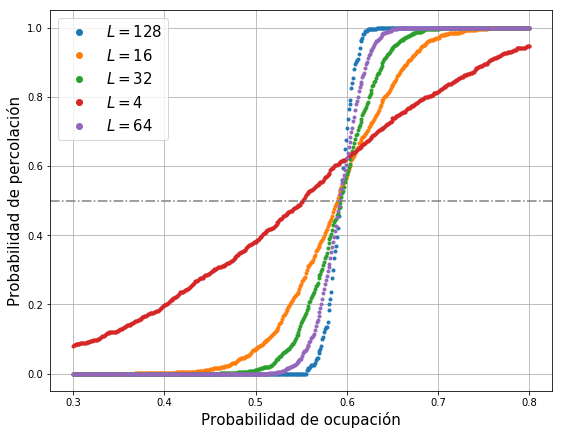

In [5]:
# Rango completo de todas. tenemos una sola curva en este rango de P. 
# son las originales que hicimos el domingo, asi que la de 128 tiene 200 iteraciones. las otras no sé, pero supongo que 5k.

os.chdir(r'C:\Users\igna\Documents\GitHub\Computacional\01 - b - probabilidad critica')

filenames = glob.glob('dim_*_Pperc_C.txt')
plt.figure(figsize=(9,7))
labels = ['$L = 128$', '$L = 16$', '$L = 32$', '$L = 4$', '$L = 64$']
i = 0
for f in filenames:
    data = np.loadtxt(fname = f)
    plt.plot(data[:,0],data[:,1], 
             '.', 
             label = labels[i])
    i = i +1
plt.axhline(y = 0.5, color = 'gray', linestyle = '-.')
plt.xlabel('Probabilidad de ocupación', fontsize = 15)
plt.ylabel('Probabilidad de percolación', fontsize = 15)
plt.legend(fontsize = 15, markerscale = 2);
plt.grid(True)
#plt.savefig('1bPcriticaPocupacion.svg')

Se presenta un gráfico con un rango de probabilidad menor para observar con más detalle la intersección entre la probabilidad de percolación = 0.5 con las curvas obtenidas para los diferentes tamaños de red.

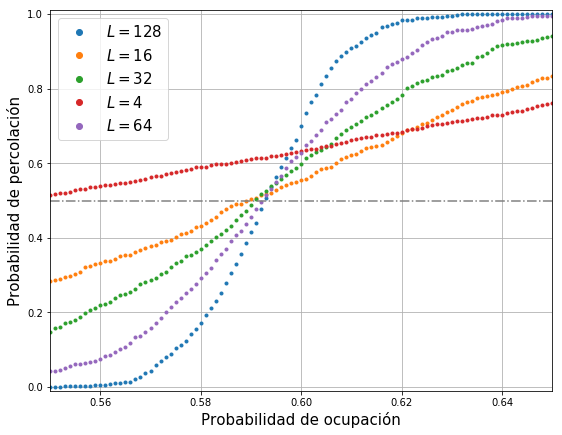

In [6]:
filenames = glob.glob('dim_*_Pperc_0.txt')
plt.figure(figsize=(9,7))
i = 0
for f in filenames:
    
    data = np.loadtxt(fname=f)

    plt.plot(data[:,0],data[:,1],'.',label= labels[i])
    
    i = i + 1
    
plt.axhline(y=0.5, color='gray', linestyle='-.')
plt.xlabel('Probabilidad de ocupación', fontsize = 15)
plt.ylabel('Probabilidad de percolación', fontsize = 15)
plt.axis([0.55,0.65,-0.01,1.01])
plt.legend(fontsize = 15, markerscale = 2);
plt.grid(True)
#plt.savefig('1bPcriticaPocupacionZoom.svg')

A continuación se calculan las probabilidades críticas obtenidas para cada dimensión de la red, resultantes del promedio de las 10 curvas realizadas barriendo desde $p = 0.55$ hasta $p = 0.65$ (probabilidad de ocupación)

In [7]:
#defino una función que agarra todos los .txt con el patrón deseado y a partir de ellos calcula 
#el promedio de la probabilidad crítica

def ProbCritica(A):
    """ A es un string con el "patrón" que va a usar
    la libreria globe para leer todos los archivos
    del diectorio donde se encuentra parado.
    
    Esta función toma todos los archivos y calcula
    el promedio de la probabilidad critica"""
    if type(A) != str:
        print('\n\nError: A debe ser un string con el patrón de nombres a usar')
    vec = np.arange(0.50,0.51,0.001)

    ps = []
    filenames = sorted(glob.glob(A))
    filenames = filenames[0:10]
    for f in filenames:
        data = np.loadtxt(fname = f)
        
        for i in range(len(data)):
            if data[i,1] in vec:
                ps.append(data[i,0])
    
    var = np.var(ps)
    pc = np.mean(ps)
    err = np.std(ps)/np.sqrt(len(data))
    return pc, var, err

In [8]:
pc_4, var4, err4 = ProbCritica('dim_4_Pperc_*.txt')
pc_16, var16, err16 = ProbCritica('dim_16_Pperc_*.txt')
pc_32, var32, err32 = ProbCritica('dim_32_Pperc_*.txt')
pc_64, var64, err64 = ProbCritica('dim_64_Pperc_*.txt')
pc_128, var128, err128 = ProbCritica('dim_128_Pperc_*.txt')

print('La prob crítica para L = 4 es p_c = %.6f' % pc_4)
print('La prob crítica para L = 16 es p_c = %.6f' % pc_16)
print('La prob crítica para L = 32 es p_c = %.6f' % pc_32)
print('La prob crítica para L = 64 es p_c = %.6f' % pc_64)
print('La prob crítica para L = 128 es p_c = %.6f' % pc_128)

La prob crítica para L = 4 es p_c = 0.579628
La prob crítica para L = 16 es p_c = 0.591049
La prob crítica para L = 32 es p_c = 0.590999
La prob crítica para L = 64 es p_c = 0.591999
La prob crítica para L = 128 es p_c = 0.592999


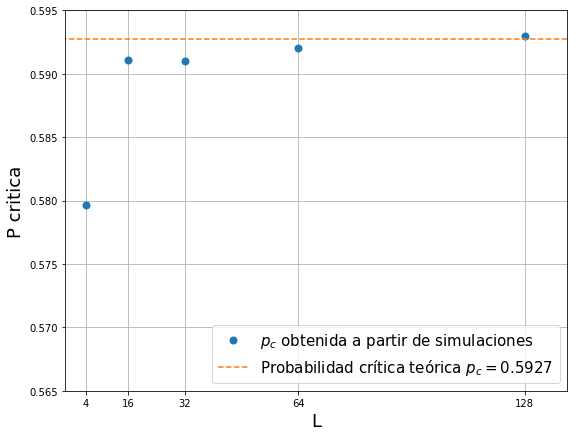

In [9]:
L_2 = [4, 16, 32, 64, 128]
Pc_2 = [pc_4, pc_16, pc_32, pc_64, pc_128]

plt.figure(figsize = (9,7))
plt.plot(L_2, Pc_2, 
         '.',
         markersize = 14,
         label = '$p_{c}$ obtenida a partir de simulaciones');

xhline = np.arange(-10,200)
yhline = np.ones(len(xhline))*0.592746050

plt.plot(xhline, yhline,
         '--',
         label = 'Probabilidad crítica teórica $p_{c} = 0.5927$')

plt.axis([-2,140, 0.565, 0.595])
plt.xticks([4, 16, 32, 64, 128])
plt.grid()
plt.xlabel('L', fontsize = 18);
plt.ylabel('P critica', fontsize = 18);
plt.legend(fontsize = 15, loc = 'lower right')
#plt.savefig('ProbabilidadCritica_Met2.svg')

## Comparacion resultados 1a y 1b

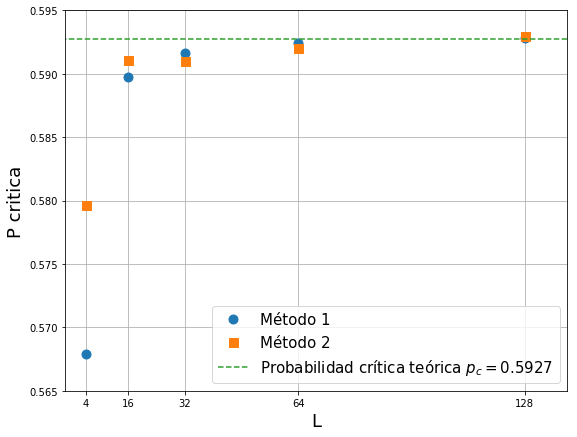

In [10]:
plt.figure(figsize=(9,7))  
plt.plot(L_1, Pc_1, 
         'o', 
         label = 'Método 1', 
         markersize = 9);
plt.plot(L_2, Pc_2, 
         's', 
         label = 'Método 2', 
         markersize = 9);

xhline = np.arange(-10,200)
yhline = np.ones(len(xhline))*0.592746050

plt.plot(xhline, yhline,
         '--',
         label = 'Probabilidad crítica teórica $p_{c} = 0.5927$')

plt.axis([-2,140, 0.565, 0.595])
plt.xticks([4, 16, 32, 64, 128])
plt.xlabel('L', fontsize = 18);
plt.ylabel('P critica', fontsize = 18);
plt.grid();
plt.legend(fontsize = 15);
#plt.savefig('1ACoparacionmetodos.pdf')

## EJERCICIO 1)C)

#### Estudie como se comporta la dispersión de los valores obtenidos en los puntos anteriores para $p_{c}$ en función del tamaño la red

Se calcularon las varianzas de las probablidades $p_{c}$ críticas obtenidas por los diferetenes métodos utilizados en los puntos 1)a) y 1)b). Se las grafica en función del tamaño de la red.

Dispersión ejercicio 1a

In [11]:
Var_1 = []
for i in range (len(data_1)):
    p = np.var(data_1[i])
    Var_1.append(p)
print(Var_1)

[0.00013008387116709177, 0.0006099642830344434, 0.0003579944402337025, 0.002289105154159794, 0.00021811200293941148]


Dispersión ejercicio 1b

In [12]:
Var_2 = [var4, var16, var32, var64, var128]
print(Var_2)

[0.00041998690147265153, 4.8459702100000915e-06, 0.0, 0.0, 0.0]


Rehago el grafico con las dispersiones como errorbars

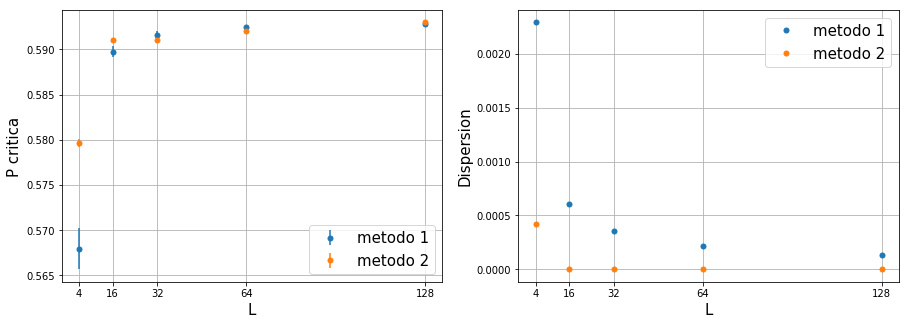

<Figure size 720x288 with 0 Axes>

In [13]:
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (15,5))

xticks = [4,16,32,64,128]

plt.figure(figsize = (10,4))
axs[0].errorbar(L_1, Pc_1, 
             Var_1, 
             fmt = '.', 
             label = 'metodo 1', 
             markersize = 10);
axs[0].errorbar(L_2, Pc_2, 
             Var_2, 
             fmt = '.', 
             label = 'metodo 2', 
             markersize = 10);
axs[0].set_xlabel('L', fontsize = 15);
axs[0].set_ylabel('P critica', fontsize = 15);
axs[0].set_xticks(xticks)
axs[0].grid();
axs[0].legend(fontsize = 15);

axs[1].plot(L_1, Var_1, 
         '.', 
         label = 'metodo 1', 
         markersize = 10);
axs[1].plot(L_2, Var_2, 
         '.', 
         label = 'metodo 2', 
         markersize = 10);
axs[1].set_xlabel('L', fontsize = 15);
axs[1].set_ylabel('Dispersion', fontsize = 15);
axs[1].set_xticks(xticks)
axs[1].grid();
axs[1].legend(fontsize = 15);

A la izquierda gráfico de la probabilidad crítica para distintos tamaños de la red, con las barras de error alrededor de los puntos representando la varianza de los datos.

A la derecha gráfico de la dispersión (varianza) de las probabilidades críticas para diferentes tamaños de la red.

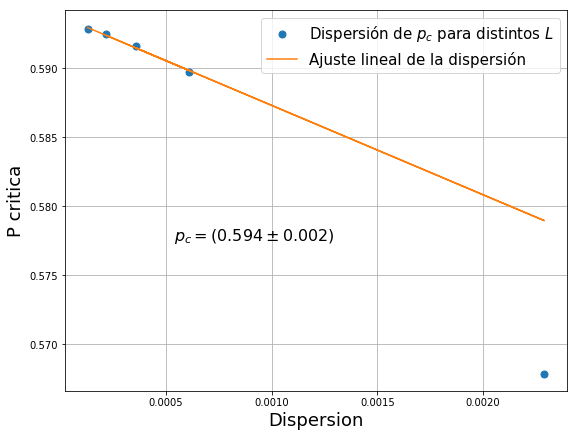

In [14]:
plt.figure(figsize=(9,7))

Var_1 = np.array(Var_1)
Pc_1 = np.array(Pc_1)

a1, a2, sigma1, sigma2 = Cuadrados_minimos(Var_1[:3], Pc_1[:3], err = True)

plt.plot(Var_1, Pc_1, 
         '.', 
         label = 'Dispersión de $p_{c}$ para distintos $L$', 
         markersize = 14);
#lt.plot(Var_2, Pc_2, 
#         's', 
#         label = 'Método 2', 
#         markersize = 9);

plt.plot(Var_1, a1 + a2*Var_1,
         '-',
         label = 'Ajuste lineal de la dispersión')

plt.text(0.000537, 0.5775, '$p_{c} = (%.3f \pm %.3f)$' % (a1, sigma1), fontsize = 16)
plt.xlabel('Dispersion', fontsize = 18);
plt.ylabel('P critica', fontsize = 18);
plt.grid();
plt.legend(fontsize = 15);
#plt.savefig('1ADispersión.svg')

In [15]:
print('La probabilidad critica para la red infinita, según este calculo es p_c = %0.4f' %  a1)

La probabilidad critica para la red infinita, según este calculo es p_c = 0.5938


# EJERCICIO 1)d)

#### Utilizando los resultados anteriores para fijar un rango de búsqueda, emplee el ajuste $\chi^2$ a la distribución de fragmentos para deteminar $p_c(L)$. Recuerde que $n_s(p_c) \approx s^{−\tau}$, por lo que ln(ns) vs. s debe ajustarse mediante una recta cuando $p = p_c$.

In [16]:
os.chdir(r'c:\users\igna\Documents\github\computacional\01 - d - n_s')

#Se define una función que toma los datos importados y los ajusta en la región
#seleccionada, que corresponde con la parte donde el logaritmo de los datos
#es lineal.
#se toma la pendiente como el valor de tau y se calcula el error de la pendiente (error de tau

def TauChi(X, a, b, err = False):
    """X = los datos cargados de .txt
    Función para hacer los ajustes lineales y obtener tau a partir
    de los histogramas de los tamaños de los clusters
    
    Si err = True devuelve el error de los parámetros del ajuste"""
    s = np.arange(a, b)
    Y = np.zeros([len(X),len(X[0,a:b])])
    chi2 = []
    A1 = []
    A2 = []
    Sgm2 = []
    if err == True:
        x = np.log(s)
        for i in range(len(X)):
            y = np.log(X[i,a:b])
            a1, a2, sigma1, sigma2 = Cuadrados_minimos(x, y, err = True)
            chi2.append(Sum_chi2(a1, a2, x, y))
            A1.append(a1)
            A2.append(a2)
            Sgm2.append(sigma2)
            Y[i,:] = y
        
        ind = chi2.index(np.min(chi2))
        return x, Y[ind,:], A1[ind], A2[ind], sigma1, Sgm2[ind]
    
    else:
        x = np.log(s)
        for i in range(len(X)):
            n_sp = X[i,a:b]
            y = np.log(n_sp)
            a1, a2 = Cuadrados_minimos(x, y)
            A1.append(a1)
            A2.append(a2)
            chi2.append(Sum_chi2(a1, a2, x, y))
        
        ind = chi2.index(np.min(chi2))
        return x, y, A1[ind], A2[ind]

## L = 4

In [17]:
#Se importan los datos
data_4 = np.loadtxt('dim_4_ns.txt')
data_16 = np.loadtxt('dim_16_ns.txt')
data_32 = np.loadtxt('dim_32_ns.txt')
data_64 = np.loadtxt('dim_64_ns.txt')
data_128 = np.loadtxt('dim_128_ns.txt')

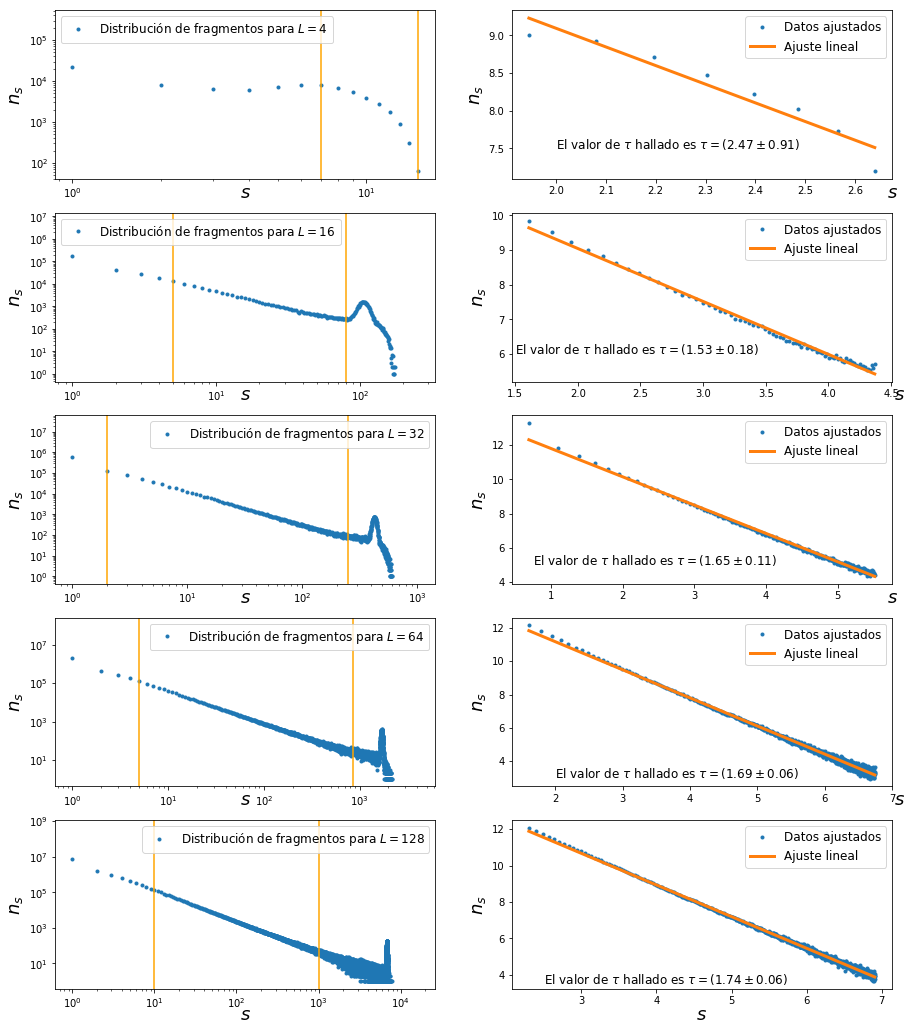

In [18]:
#pongo las figuras de todas las distribuciones de fragmentos en un subplot grande,
#ensucia una celda pero no esucia el codigocon muchas celdas
fig, axd = plt.subplots(ncols = 2, nrows = 5, figsize = (15,18))
lfsize = 12
axfsize = 18

#se definen los márgenes donde se ajusta
a_4 = 7
b_4 = 15

#gráficos del logaritmo de los datos importados
axd[0,0].plot(data_4[50,1:], '.', label = 'Distribución de fragmentos para $L=4$')
axd[0,0].axvline(a_4, color = 'orange')
axd[0,0].axvline(b_4, color = 'orange')
axd[0,0].set_yscale('log')
axd[0,0].set_xscale('log')
axd[0,0].set_ylabel('$n_s$', fontsize = axfsize)
axd[0,0].set_xlabel('$s$', fontsize = axfsize)
axd[0,0].xaxis.set_label_coords(0.5, -0.025)
axd[0,0].legend(fontsize = lfsize)

#calculo los datos del ajuste, obtengo el tau de estos
x4, y4, a4, b4, sa4, sb4 = TauChi(data_4, a_4, b_4, err = True)

#grafico el ajuste del logaritmo de los datos
axd[0,1].plot(x4, y4, '.', label = 'Datos ajustados')
axd[0,1].plot(x4, a4 + b4*x4, linewidth = 3, label = 'Ajuste lineal')
axd[0,1].set_ylabel('$n_s$', fontsize = axfsize)
axd[0,1].set_xlabel('$s$', fontsize = axfsize)
axd[0,1].xaxis.set_label_coords(1, -0.025)
axd[0,1].text(2, 7.5, 'El valor de $\u03C4$ hallado es $\u03C4 = (%.2f \pm %.2f)$ ' % (-b4, sb4), fontsize = lfsize)
axd[0,1].legend(fontsize = lfsize)

#se definen los márgenes donde se ajusta
a_16 = 5
b_16 = 80

#gráficos del logaritmo de los datos importados
axd[1,0].plot(data_16[50,1:], '.', label = 'Distribución de fragmentos para $L=16$')
axd[1,0].axvline(a_16, color = 'orange')
axd[1,0].axvline(b_16, color = 'orange')
axd[1,0].set_yscale('log')
axd[1,0].set_xscale('log')
axd[1,0].set_ylabel('$n_s$', fontsize = axfsize)
axd[1,0].set_xlabel('$s$', fontsize = axfsize)
axd[1,0].xaxis.set_label_coords(0.5,-0.025)
axd[1,0].legend(fontsize = lfsize)

#calculo los datos del ajuste, obtengo el tau de estos
x16, y16, a16, b16, sa16, sb16 = TauChi(data_16, a_16, b_16, err = True)

#grafico el ajuste del logaritmo de los datos
axd[1,1].plot(x16, y16, '.', label = 'Datos ajustados')
axd[1,1].plot(x16, a16 + b16*x16, linewidth = 3, label = 'Ajuste lineal')
axd[1,1].set_ylabel('$n_s$', fontsize = axfsize)
axd[1,1].set_xlabel('$s$', fontsize = axfsize)
axd[1,1].xaxis.set_label_coords(1.02, -0.025)
axd[1,1].text(1.5, 6, 'El valor de $\u03C4$ hallado es $\u03C4 = (%.2f \pm %.2f)$ ' % (-b16, sb16), fontsize = lfsize)
axd[1,1].legend(fontsize = lfsize)

#se definen los márgenes donde se ajusta
a_32 = 2
b_32 = 250

#gráficos del logaritmo de los datos importados
axd[2,0].plot(data_32[50,1:], '.', label = 'Distribución de fragmentos para $L=32$')
axd[2,0].axvline(a_32, color = 'orange')
axd[2,0].axvline(b_32, color = 'orange')
axd[2,0].set_yscale('log')
axd[2,0].set_xscale('log')
axd[2,0].set_ylabel('$n_s$', fontsize = axfsize)
axd[2,0].set_xlabel('$s$', fontsize = axfsize)
axd[2,0].xaxis.set_label_coords(0.5,-0.025)
axd[2,0].legend(fontsize = lfsize)

#calculo los datos del ajuste, obtengo el tau de estos
x32, y32, a32, b32, sa32, sb32 = TauChi(data_32, a_32, b_32, err = True)

#grafico el ajuste del logaritmo de los datos
axd[2,1].plot(x32, y32, '.', label = 'Datos ajustados')
axd[2,1].plot(x32, a32 + b32*x32, linewidth = 3, label = 'Ajuste lineal')
axd[2,1].set_ylabel('$n_s$', fontsize = axfsize)
axd[2,1].set_xlabel('$s$', fontsize = axfsize)
axd[2,1].xaxis.set_label_coords(1, -0.025)
axd[2,1].text(0.75, 5, 'El valor de $\u03C4$ hallado es $\u03C4 = (%.2f \pm %.2f)$ ' % (-b32, sb32), fontsize = lfsize)
axd[2,1].legend(fontsize = lfsize)

#se definen los márgenes donde se ajusta
a_64 = 5
b_64 = 850

#gráficos del logaritmo de los datos importados
axd[3,0].plot(data_64[50,1:], '.', label = 'Distribución de fragmentos para $L=64$')
axd[3,0].axvline(a_64, color = 'orange')
axd[3,0].axvline(b_64, color = 'orange')
axd[3,0].set_yscale('log')
axd[3,0].set_xscale('log')
axd[3,0].set_ylabel('$n_s$', fontsize = axfsize)
axd[3,0].set_xlabel('$s$', fontsize = axfsize)
axd[3,0].xaxis.set_label_coords(0.5, -0.025)
axd[3,0].legend(fontsize = lfsize)

#calculo los datos del ajuste, obtengo el tau de estos
x64, y64, a64, b64, sa64, sb64 = TauChi(data_64, a_64, b_64, err = True)

#grafico el ajuste del logaritmo de los datos
axd[3,1].plot(x64, y64, '.', label = 'Datos ajustados')
axd[3,1].plot(x64, a64 + b64*x64, linewidth = 3, label = 'Ajuste lineal')
axd[3,1].set_ylabel('$n_s$', fontsize = axfsize)
axd[3,1].set_xlabel('$s$', fontsize = axfsize)
axd[3,1].xaxis.set_label_coords(1.02, -0.025)
axd[3,1].text(2, 3, 'El valor de $\u03C4$ hallado es $\u03C4 = (%.2f \pm %.2f)$ ' % (-b64, sb64), fontsize = lfsize)
axd[3,1].legend(fontsize = lfsize)

#se definen los márgenes donde se ajusta
a_128 = 10
b_128 = 1000

#gráficos del logaritmo de los datos importados
axd[4,0].plot(data_128[50,1:], '.', label = 'Distribución de fragmentos para $L=128$')
axd[4,0].axvline(a_128, color = 'orange')
axd[4,0].axvline(b_128, color = 'orange')
axd[4,0].set_yscale('log')
axd[4,0].set_xscale('log')
axd[4,0].set_ylabel('$n_s$', fontsize = axfsize)
axd[4,0].set_xlabel('$s$', fontsize = axfsize)
axd[4,0].xaxis.set_label_coords(0.5,-0.1)
axd[4,0].legend(fontsize = lfsize)

#calculo los datos del ajuste, obtengo el tau de estos
x128, y128, a128, b128, sa128, sb128 = TauChi(data_128, a_128, b_128, err = True)

#grafico el ajuste del logaritmo de los datos
axd[4,1].plot(x128, y128, '.',label = 'Datos ajustados')
axd[4,1].plot(x128, a128 + b128*x128, linewidth = 3, label = 'Ajuste lineal')
axd[4,1].set_ylabel('$n_s$', fontsize = axfsize)
axd[4,1].set_xlabel('$s$', fontsize = axfsize)
axd[4,1].xaxis.set_label_coords(0.5, -0.1)
axd[4,1].text(2.5, 3.5, 'El valor de $\u03C4$ hallado es $\u03C4 = (%.2f \pm %.2f)$ ' % (-b128, sb128), fontsize = lfsize)
axd[4,1].legend(fontsize = lfsize)
#plt.savefig('1dfiguras.pdf')

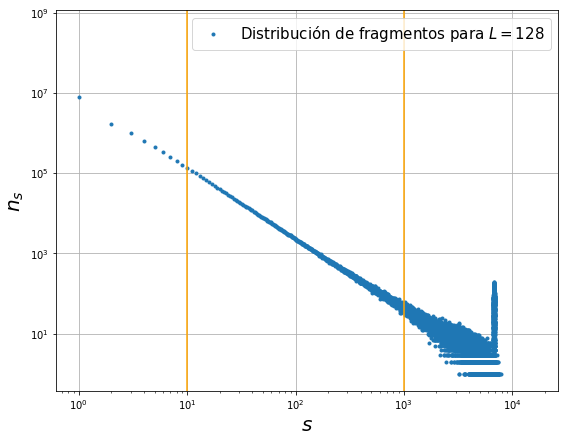

In [19]:
plt.figure(figsize = (9,7))
plt.plot(data_128[50,1:], '.', label = 'Distribución de fragmentos para $L=128$')
plt.axvline(a_128, color = 'orange')
plt.axvline(b_128, color = 'orange')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('$n_s$', fontsize = 20)
plt.xlabel('$s$', fontsize = 20)
plt.legend(fontsize = 15)
plt.grid(which = 'major')
#plt.savefig('2DistFrag.svg')

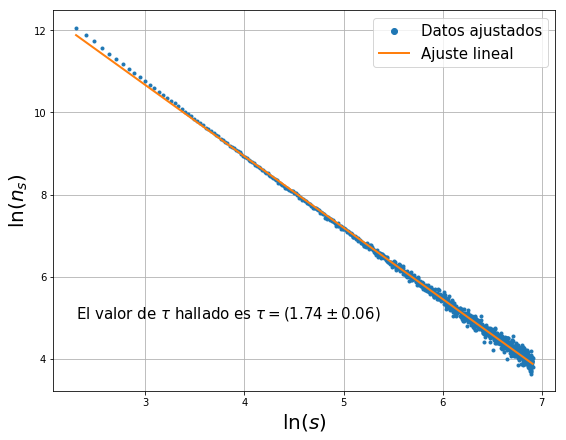

In [20]:
#calculo los datos del ajuste, obtengo el tau de estos
x128, y128, a128, b128, sa128, sb128 = TauChi(data_128, a_128, b_128, err = True)

#grafico el ajuste del logaritmo de los datos
plt.figure(figsize = (9,7))
plt.plot(x128, y128, '.',label = 'Datos ajustados')
plt.plot(x128, a128 + b128*x128, linewidth = 2, label = 'Ajuste lineal')
plt.ylabel('$\ln{(n_s)}$', fontsize = 20)
plt.xlabel('$\ln{(s)}$', fontsize = 20)
plt.text(2.3, 5, 'El valor de $\u03C4$ hallado es $\u03C4 = (%.2f \pm %.2f)$ ' % (-b128, sb128), fontsize = 15)
plt.legend(fontsize = 15, markerscale = 2)
plt.grid()
#plt.savefig('1DTauAjuste.pdf')

Notar que los gráficos de la izquierda son representativos de la forma que en general tenían los histogramas de la distribución de tamaños. Se grafican para 1 sola probibildiad arbitraria. Sin embargo, en los gráficos de la derercha se muestra el ajuste resultante para una probabilidad tal que minimiza el valor de $\chi^2$

## EJERCICIO 2

#### Calcule la intensidad del cluster percolante $P_{\inf}$ en función de $p$ para diversos tamaños de la red.


Para esto barremos en probabilidad desde 0.55 hasta 0.8 con un paso de 0.01. Para cada probabilidad realizamos 27000 iteraciones de "poblar la red -> ver si percola -> if percola => calcula la masa percolante y la guarda junto con la p". Luego, ya en python, con todos los valores de masa hallados para cada $p$ realizamos un promedio, obteniendo así un valor de masa percolante para cada tamaño de red L. Luego, para calcular la intensidad, dividimos ese valor por $L^2$.

In [21]:
os.chdir(r'C:\Users\igna\Documents\GitHub\Computacional\02 - masa_27K')

In [22]:
def Intensidad(A, L):
    masas = []
    std = []

    for i in range (len(A)):
        masas_p = A[i,1:]
        masas.append(np.mean(masas_p))
        std.append(np.std(masas_p))
    
    prob = np.array(A[:,0])
    masas = np.array(masas)
    std = np.array(std)
    err = std/np.sqrt(len(A[1,1:]))
    
    return prob, masas/L**2, std/L**2

## L = 4

In [23]:
#archivos disjuntos para L = 4
d4 = np.loadtxt('dim_4_masa_27K.txt')
d4_2 = np.loadtxt('dim_4_masa_27K2.txt')
d4_4 = np.loadtxt('dim_4_masa_27K4.txt')

#archivos L=16,64,128
D16 = np.loadtxt('02052019 - dim_16_masa_27Kpercolantes2.txt')
D64 = np.loadtxt('02052019 - dim_64_masa_27kpercolantes.txt')
D128 = np.loadtxt('02052019 - MasaD128-Perc27k-P055-div01.txt')

In [24]:

#dado que para las redes de dimensión 4 tenemos los datos disjuntos,
#se hace esta celda para juntar los datos y poder hacer el gráfico correspondiente
masas_4 = []
for i in range (len(d4)):
    masas_p = d4[i,1:]
    masas_4.append(np.mean(masas_p))
    
prob_4 = d4[:,0]

for i in range (len(d4_2)):
    masas_p = d4_2[i,1:]
    masas_4.append(np.mean(masas_p))
    
prob_4 = np.append(prob_4,d4_2[:,0])

for i in range (len(d4_4)):
    masas_p = d4_4[i,1:]
    masas_4.append(np.mean(masas_p))
    
Prob4 = np.append(prob_4,d4_4[:,0])

I4 = np.array(masas_4)/4**2

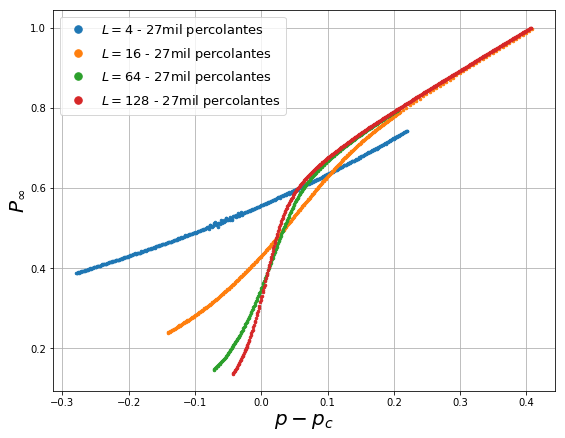

In [25]:
#se grafican entonces intensidades de los clusters clusters percolantes en función de (p-pc)

Prob16, I16, err16 = Intensidad(D16, 16)
Prob64, I64, err64 = Intensidad(D64, 64)
Prob128, I128, err128 = Intensidad(D128,128)

pc4 = 0.5796
pc16 = 0.591
pc64 = 0.5919
pc128 = 0.5929

Prob4 = Prob4 - pc4
Prob16 = Prob16 - pc16
Prob64 = Prob64 - pc64
Prob128 = Prob128 - pc128


plt.figure(figsize = (9,7))
plt.plot(Prob4,I4,'.', markersize = 5, label = '$L = 4$ - 27mil percolantes');

plt.plot(Prob16, I16,'.', markersize = 5, label = '$L = 16$ - 27mil percolantes')

plt.plot(Prob64, I64,'.', markersize = 5, label = '$ L = 64$ - 27mil percolantes')

plt.plot(Prob128, I128,'.', markersize = 5, label = '$L = 128$ - 27mil percolantes')

plt.xlabel('$p-p_c$', fontsize = 20);
plt.ylabel('$P_\infty$', fontsize = 20);
plt.legend(markerscale = 3, fontsize = 13)
plt.grid()
#plt.yscale('log')
#plt.xscale('log')
#plt.savefig('2IntensidadCPerc.pdf')

Grafico de intensidad de clusters percolantes vs $p - p_{c}$. Dado que es muy dificil que un cluster percole con probabilidades menores a $p = 0.5$, no fue posible realizar la simulaciones para todo el espectro de probabilidades, en especial con las redes de mayor tamaño.

C:\Users\igna\AppData\Local\conda\conda\envs\Python36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


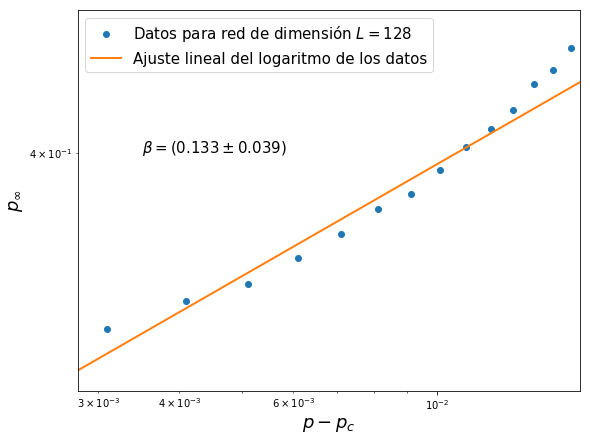

In [26]:
a = 48
b = 60

x = np.log(Prob128[a:b])
y = np.log(I128[a:b])

a1, a2, sigma1, sigma2 = Cuadrados_minimos(x, y, err = True)
plt.figure(figsize = (9,7))
plt.plot(Prob128, I128,
     '.',
     markersize = 12, 
     label = 'Datos para red de dimensión $L = 128$')

plt.plot(Prob128, np.exp(a1+a2*np.log(Prob128)),
         linewidth = 2,
         label = 'Ajuste lineal del logaritmo de los datos')


plt.xlabel('$p-p_{c}$', fontsize = 18)
plt.ylabel('$p_{\infty}$', fontsize = 18)
plt.yscale('log')
plt.xscale('log')
#plt.axvline(Prob128[a])
#plt.axvline(Prob128[b])
plt.legend(fontsize = 15)
plt.axis([Prob128[a]*0.9, Prob128[b]*1.1, I128[a]*0.95, I128[b]*1.05])
plt.text(0.0035, 0.4, '$\u03B2 = (%.3f \pm %.3f)$' %(a2,sigma2), fontsize = 15);
#plt.savefig('2Beta128.svg')

C:\Users\igna\AppData\Local\conda\conda\envs\Python36\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


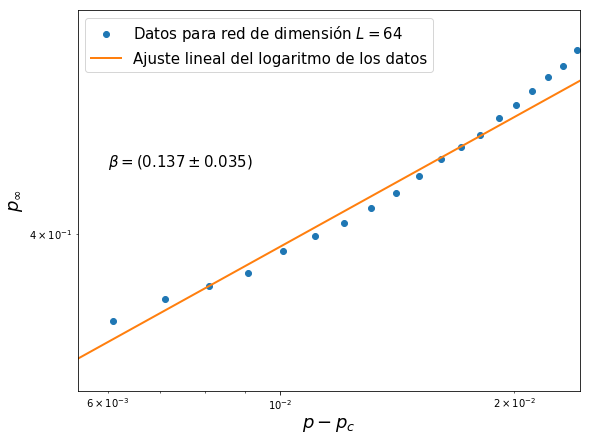

In [27]:
a = 78
b = 94
x1 = np.log(Prob64[a:b])
y1 = np.log(I64[a:b])

a1, a2, sigma1, sigma2 = Cuadrados_minimos(x1, y1, err = True)
plt.figure(figsize = (9,7))
plt.plot(Prob64, I64,
     '.',
     markersize = 12,
     label = 'Datos para red de dimensión $L = 64$')

plt.plot(Prob64, np.exp(a1+a2*np.log(Prob64)),
         linewidth = 2,
         label = 'Ajuste lineal del logaritmo de los datos')

#plt.axvline(Prob64[a])
#plt.axvline(Prob64[b])
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize = 15)
plt.xlabel('$p-p_{c}$', fontsize = 18)
plt.ylabel('$p_{\infty}$', fontsize = 18)

plt.axis([Prob64[a]*0.9, Prob64[b]*1.1, I64[a]*0.95, I64[b]*1.05])
plt.text(0.006, 0.42, '$\u03B2 = (%.3f \pm %.3f)$' %(a2,sigma2), fontsize = 15);
#plt.savefig('2Beta64.svg')

## EJERCICIO 3: dimensión fractal

#### Encuentre la masas $M$ del cluster percolante para $p = p_{c}$ como función de $L$. Calcule la dimensión fractal involucrada.

Se calcularon las masas de los clusters percolantes para los diferentes tamaños de la red, haciendo simulaciones de la siguiente manera:

Se pobló la red con una probabilidad inicial de $p = 0.5$ y mediante el algoritmo de iteraciones $p \pm \frac{p}{2^{n}}$ se convergió a una probabilidad cercana a $p_c$ y en la que la red percola, mediante la repetición hasta obtener 10 redes percolantes. A la última red poblada del procedimiento anterior se le calcula la masa del cluster percolante.

El procedimiento anterior se repite 27mil veces y se obtienen probabilidades $p$ de percolación junto con la masa crítica del cluster percolante.

In [28]:
os.chdir(r'C:\Users\igna\Documents\GitHub\Computacional\03 - masa_prob_critica')

In [29]:
A4 = np.loadtxt('dim_4_MasaPerc.txt')
A16 = np.loadtxt('dim_16_MasaPerc.txt')
A32 = np.loadtxt('dim_32_MasaPerc.txt')
A64 = np.loadtxt('dim_64_MasaPerc.txt')
A128 = np.loadtxt('dim_128_MasaPerc.txt')

calculo los promedios de la masa percolante para cada tamaño de la red y el error de los promedios, dado por $\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}}$ donde $N$ es el número total de datos, en este caso 27000 y $\sigma$ es la desviación estandar de los mismos

In [30]:
Mperc004 = np.mean(A4[:,1])
Mperc016 = np.mean(A16[:,1])
Mperc032 = np.mean(A32[:,1])
Mperc064 = np.mean(A64[:,1])
Mperc128 = np.mean(A128[:,1])

err004 = np.std(A4[:,1])/np.sqrt(27000)
err016 = np.std(A16[:,1])/np.sqrt(27000)
err032 = np.std(A32[:,1])/np.sqrt(27000)
err064 = np.std(A64[:,1])/np.sqrt(27000)
err128 = np.std(A128[:,1])/np.sqrt(27000)

Mperc = np.array([Mperc004, Mperc016, Mperc032, Mperc064, Mperc128])
err = np.array([err004, err016, err032, err064, err128,])
L = np.array([4, 16, 32, 64, 128])

Grafico entonces las promedios de las masas percolantes, con sus errores, en función del tamaño de la red

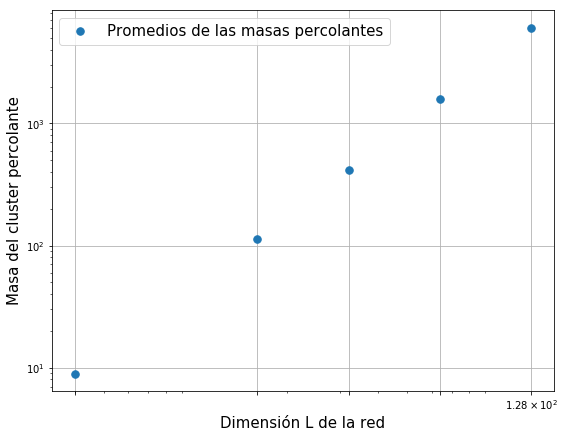

In [31]:
plt.figure(figsize = (9,7))

plt.plot(L, Mperc, 
         '.',
         markersize = 15,
         label = 'Promedios de las masas percolantes')

plt.yscale('log')
plt.xscale('log')
plt.xticks(L)
plt.xlabel('Dimensión L de la red', fontsize = 15)
plt.ylabel('Masa del cluster percolante', fontsize = 15)
plt.legend(fontsize = 15);
plt.grid()

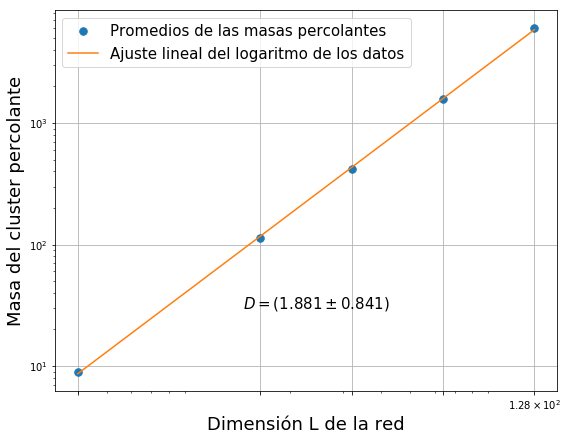

In [32]:
#el ajuste de los puntos (linealizando ambos ejes)
a1, a2, sigma1, sigma2 = Cuadrados_minimos(np.log(L),np.log(Mperc), err =True )

#el gráfico de los puntos con su ajuste
plt.figure(figsize = (9,7))

plt.plot(L, Mperc, 
         '.',
         markersize = 15,
         label = 'Promedios de las masas percolantes')

plt.plot(L, np.exp(a1 + a2*np.log(L)), label = 'Ajuste lineal del logaritmo de los datos')

#plt.errorbar(L, Mperc, 
#             yerr = err,
#             fmt = '.',
#             label = 'Errores de los promedios')

#plt.axis([3.99999, 4.0000, 100, 120])
plt.yscale('log')
plt.xscale('log')
plt.xticks(L)
plt.xlabel('Dimensión L de la red', fontsize = 18)
plt.ylabel('Masa del cluster percolante', fontsize = 18)
plt.legend(fontsize = 15);
plt.text(14,30,
        '$D = (%.3f \pm %.3f)$' % (a2,sigma2),
         fontsize = 15)
plt.grid()
#plt.savefig('3DimFractalAjuste.pdf')

# EJERCICIO 4

## VOLVER A ESTO CON RANGO MAS GRANDE DE PROBABILIDADES

In [33]:
os.chdir(r'c:\users\igna\Documents\github\computacional\01 - d - n_s')

In [34]:
# Nos piden con L = 64
data_64 = np.loadtxt('dim_64_ns.txt') 
data_64_2 = np.loadtxt('dim_64_ns2.txt')
data_64_3 = np.loadtxt('dim_64_ns3.txt')

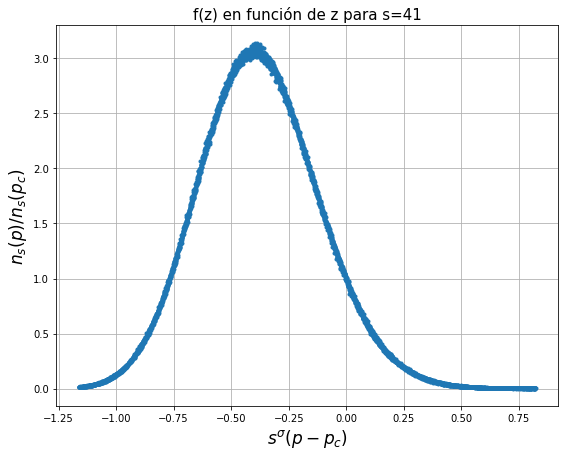

In [35]:
probs_64 = data_64[:,0] # Vector de probabilidades
n_41 = data_64[:,40] # Los valores de n_s para s=41 para todos los valores de p.

# Appendeo los otros tramos

probs_64 = np.append(probs_64,data_64_2[:,0])
probs_64 = np.append(probs_64,data_64_3[:,0])

n_41 = np.append(n_41,data_64_2[:,40])
n_41 = np.append(n_41,data_64_3[:,40])


# Busco el n_41 de p = pc

cercano = find_nearest(data_64[:,0],0.5927)
i_pc = np.where(data_64[:,0] == cercano) # Busco el índice de ese valor

n_41_pc = data_64[i_pc,40] # Valor de n_s para s=41 para p = pc.


# Defino el vector f y el vector z (y todo lo que necesito para eso)

f = n_41/n_41_pc # vector f para s=41
epsilon = (probs_64 - cercano) # p-pc
sigma = 0.3711
z = (41**sigma)*epsilon # vector z

# Grafico
plt.figure(figsize = (9,7))
plt.plot(z,f[0],'.', label = 'función $f(z)$ para $s = 41$');
plt.xlabel('$s^\sigma (p-p_c)$', fontsize = 17)
plt.ylabel('$n_s(p)/n_s(p_c)$', fontsize = 17)
plt.grid();
plt.title('f(z) en función de z para s=41', fontsize = 15);

Me piden que haga esto para $41 < s < 491$. Voy a hacerlo para todos pero solo voy a hacer el grafico para algunos valores de s.

In [36]:
# Vector de probabilidades
probs_64 = data_64[:,0]
probs_64 = np.append(probs_64,data_64_2[:,0])
probs_64 = np.append(probs_64,data_64_3[:,0])

# Calculo (p-pc) y defino sigma
epsilon = (probs_64 - cercano) # p-pc
sigma = 0.3711

# Busco indice de pc
cercano = find_nearest(data_64[:,0],0.5927)
i_pc = np.where(data_64[:,0] == cercano) # Busco el índice de ese valor


# Calculo el vector de n_s, f y z para cada valor de s
f = []
z = []
for i in range (40,490):
    n_i = data_64[:,i]
    n_i = np.append(n_i,data_64_2[:,i])
    n_i = np.append(n_i,data_64_3[:,i])
    
    n_i_pc = data_64[i_pc,i] # Valor de n_s para p = pc.
    
    f.append(n_i/n_i_pc) # vector f para s=i
    z.append((i**sigma)*epsilon)  # vector z


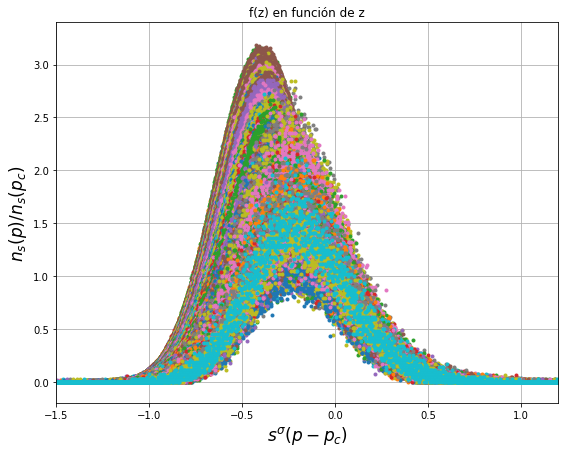

In [37]:
# Grafico
plt.figure(figsize = (9,7))
for i in range (len(z)):
    plt.plot(z[i],f[i][0],'.');

# plt.plot(z[100],f[100][0],'.', label = '241');
# plt.plot(z[400],f[400][0],'.',label = '441');
plt.xlabel('$s^\sigma (p-p_c)$', fontsize = 17)
plt.ylabel('$n_s(p)/n_s(p_c)$', fontsize = 17)
plt.grid();
plt.axis([-1.5, 1.2, -0.2, 3.4])
#plt.legend();
plt.title('f(z) en función de z');

# EJERCICIO 5

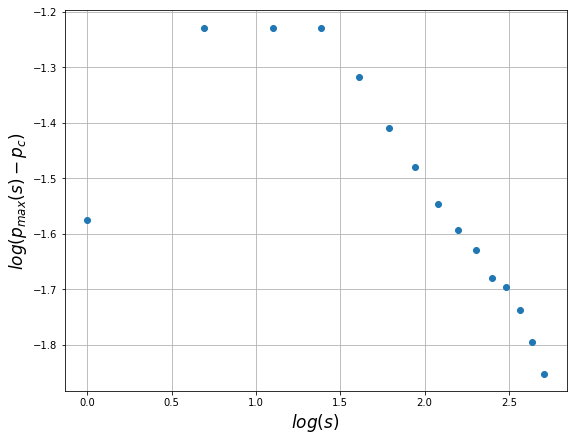

In [38]:
# Vector de probs a las que corresponde el valor máximo de n_s para un dado s
p_Max = []
for i in range (1,16):
    n_i = data_64[:,i]
    n_i = np.append(n_i,data_64_2[:,i])
    n_i = np.append(n_i,data_64_3[:,i])
    n_i_Max = max(n_i)
    i_Max = np.where(n_i == n_i_Max)
    p_Max.append(probs_64[i_Max])
    
    
# Armo el vector que tengo que graficar: log(pmax-pc)
p_dif = p_Max - cercano # es "cercano = Pc" porque ya lo hallé en ejercicio 4
log_dif = np.log(abs(p_dif))

# Armo el otro vector que tengo que graficar: log(s)
s = np.arange(1,16,1)
log_s = np.log(s)

# Grafico
plt.figure(figsize = (9,7))
plt.plot(log_s,log_dif,'.', markersize = 12);
plt.xlabel('$log(s)$', fontsize = 17);
plt.ylabel('$log(p_{max}(s)-p_c)$', fontsize = 17);
plt.grid()

Los valores en $y$ a Lufa le dan positivos.. not sure why. Not sure si está mal.. 
Anyway. De esto nos interesa sacar el valor de $\sigma$ que es la pendiente de la recta que ajuste este gráfico.
Para ajustar voy a tirar los primeros tres valores porque son la cara de la verga y despues aplico cuadrados minimos.

El valor de sigma es 0.452 cuando el valor teórico de sigma es 0.371


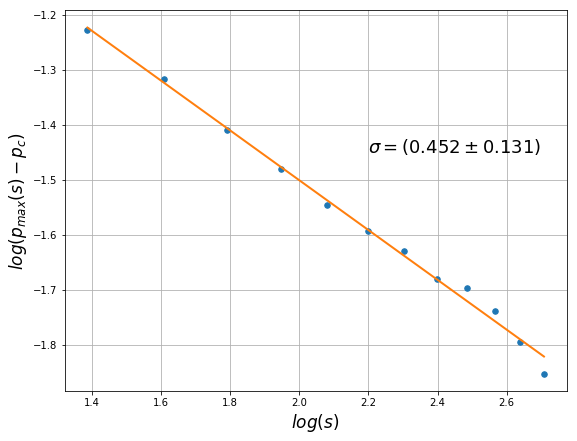

In [39]:
x = log_s[3:]
y = log_dif[3:,0]

a1, a2, sigma1, sigma2 = Cuadrados_minimos(x,y, err = True)
print('El valor de sigma es',"%.3f" % -a2,'cuando el valor teórico de sigma es 0.371')

plt.figure(figsize = (9,7))
plt.plot(x,y,'.', markersize = 11);
plt.plot(x,x*a2+a1, linewidth = 2);
plt.xlabel('$log(s)$', fontsize = 17);
plt.ylabel('$log(p_{max}(s)-p_c)$', fontsize = 17);
plt.text(2.2, -1.45, '$\sigma = (%0.3f \pm %.3f)$' % (-a2, sigma2), fontsize = 18)
plt.grid()

# EJERCICIO 6

#### Para $L = 6$ y $L = 128$ encuentre el exponente crítico $\gamma$. Estudie el comportamiento cerca de $\epsilon = (p-p_{c})/p_{c} \approx = 0$ de los momentos de orden dos.

In [40]:
os.chdir(r'c:\users\igna\Documents\github\computacional\06 - gamma matching')

In [41]:
data_6 = np.loadtxt('dim_6_ns_gamma.txt')
data_16 = np.loadtxt('dim_16_ns_gamma.txt')
data_32 = np.loadtxt('dim_32_ns_gamma.txt')

In [42]:
#función que hace los ajustes lineales locales, por tramos de longitud b-a
#devuelve el valor de gamma hallado (la pendiente) y el error del parámetro.
def GammaMatching(m, epsilon, a, b, N):
    gamma_der = []
    epsilon_der = []
    sigma = []
    i = a
    
    epsilon = abs(epsilon)
    while i < b:
        curva_der = m[i:i+N]
        eps_der = epsilon[i:i+N]
        x = np.log(eps_der)
        y = np.log(curva_der)
        a1, a2, sigma1, sigma2 = Cuadrados_minimos(x, y, err = True)
        gamma_der.append(abs(a2))
        
        epsilon_der.append(np.mean(eps_der)) #
        sigma.append(sigma2)
        i = i+N
        
    return epsilon_der, gamma_der, sigma

## L = 6

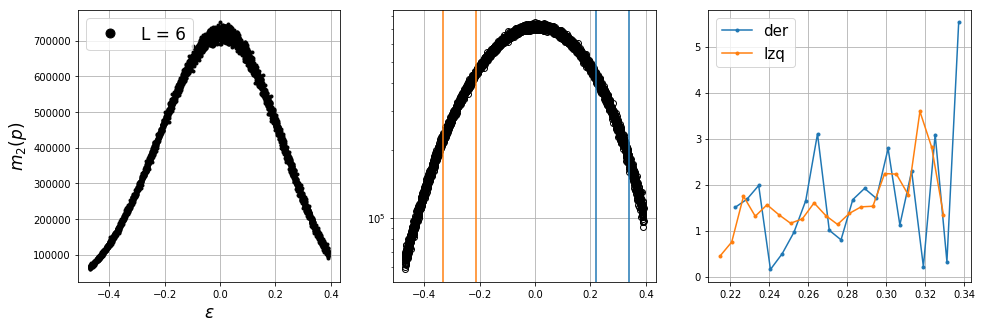

In [43]:
a = 10
b = 6**2
s_6 = np.arange(a,b) # El vector s (que tomando logaritmo es el x que va en la funcion de cuadrados minimos), 
#es siempre el mismo, para todos los p's.
m2_6 = []

for i in range(len(data_6)):
    n_s_6_p = data_6[i,a:b]    
    terminos_m2_6 = []
    for j in range (len(n_s_6_p)):
        terminos_m2_6.append(n_s_6_p[j]*(s_6[j])**2)
    m2_6.append(sum(terminos_m2_6))

    
# Genero vector epsilon   
probs_6 = data_6[:,0]

i_Max_6 = m2_6.index(max(m2_6))

epsilon_6 = (probs_6 - probs_6[i_Max_6])/0.58# le resto la pc
#############################
#############################
a = 800
b = 1500
c = 4000
d = 4700

partes = 35
#x= np.arange(0,1103)
epsilon_der6, gamma_der6, sigma_der6 = GammaMatching(m2_6, epsilon_6, c, d, partes)
epsilon_izq6, gamma_izq6, sigma_izq6 = GammaMatching(m2_6, epsilon_6, a ,b, partes)

fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (16,5))
# Grafico
axs[0].plot(epsilon_6, m2_6, 'k.',label = 'L = 6');
axs[0].set_xlabel('$\epsilon$',fontsize = 17)
axs[0].set_ylabel('$m_2(p)$', fontsize = 17)
axs[0].grid();
axs[0].legend(fontsize = 17, markerscale = 3);

axs[1].plot(epsilon_6, m2_6, 'ko', fillstyle = 'none')
axs[1].axvline(epsilon_6[a], color=(1,0.498,0.055))
axs[1].axvline(epsilon_6[b], color=(1,0.498,0.055))
axs[1].axvline(epsilon_6[c], color=(0.122,0.467,0.705))
axs[1].axvline(epsilon_6[d], color=(0.122,0.467,0.705))
axs[1].grid()
axs[1].set_yscale('log')

axs[2].plot(epsilon_der6, gamma_der6,'.-', label = 'der')
axs[2].plot(epsilon_izq6, gamma_izq6,'.-', label = 'Izq')
axs[2].legend(fontsize = 15)
axs[2].grid()
#plt.axis([0.1, 0.16, -0.2,3])

Se tomaron las intersecciones de las curvas (linea de trazo contínuo) como los valores de $\gamma$. Se obtuvieron los valores y se promediaron, obteniéndose el siguiente resultado para la estimación de $\gamma$

In [44]:
Gammas6 = np.array([1.4534, 1.17059, 1.63623, 1.64488, 2.31224, 1.246029, 2.31534, 2.38942, 1.23082<3])
Gamma6 = np.mean(Gammas6) 
Gamma_std6 = np.std(Gammas6)
print('El valor de Gamma hallado es gamma6 = %.3f +\- %.3f' % (Gamma6, Gamma_std6))

El valor de Gamma hallado es gamma6 = 1.685 +\- 0.502


## L = 16

PRUEBA CON L = 16

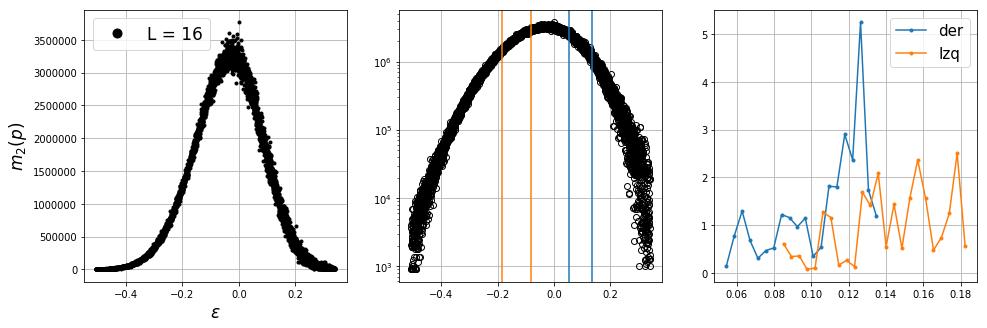

In [45]:
a = 30
b = 16**2
s_16 = np.arange(a,b) # El vector s (que tomando logaritmo es el x que va en la funcion de cuadrados minimos), es siempre el mismo, para todos los p's.
m2_16 = []

for i in range (len(data_16)):
    n_s_16_p = data_16[i,a:b]    
    terminos_m2_16 = []
    for j in range (len(n_s_16_p)):
        terminos_m2_16.append(n_s_16_p[j]*(s_16[j])**2)
    m2_16.append(sum(terminos_m2_16))

    
# Genero vector epsilon   
probs_16 = data_16[:,0]

i_Max_16 = m2_16.index(max(m2_16))

#epsilon = (probs_16 - probs_16[i_Max])# le resto la pc
epsilon_16 = (probs_16 - probs_16[i_Max_16])/pc_16# le resto la pc

#############################
#############################
a = 1900
b = 2500
c = 3300
d = 3780

partes = 25
#x= np.arange(0,1103)
epsilon_der16, gamma_der16, sigma_der16 = GammaMatching(m2_16, epsilon_16, c, d, partes)
epsilon_izq16, gamma_izq16, sigma_izq16 = GammaMatching(m2_16, epsilon_16, a ,b, partes)


#GRÁFICOS
fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (16,5))
# Grafico
axs[0].plot(epsilon_16, m2_16, 'k.',label = 'L = 16');
axs[0].set_xlabel('$\epsilon$',fontsize = 17)
axs[0].set_ylabel('$m_2(p)$', fontsize = 17)
axs[0].grid();
axs[0].legend(fontsize = 17, markerscale = 3);

axs[1].plot(epsilon_16, m2_16, 'ko', fillstyle = 'none')
axs[1].axvline(epsilon_16[a], color=(1,0.498,0.055))
axs[1].axvline(epsilon_16[b], color=(1,0.498,0.055))
axs[1].axvline(epsilon_16[c], color=(0.122,0.467,0.705))
axs[1].axvline(epsilon_16[d], color=(0.122,0.467,0.705))
axs[1].grid()
axs[1].set_yscale('log')

axs[2].plot(epsilon_der16, gamma_der16,'.-', label = 'der')
axs[2].plot(epsilon_izq16, gamma_izq16,'.-', label = 'Izq')
axs[2].legend(fontsize = 15)
axs[2].grid()
#plt.axis([0.1, 0.16, -0.2,3])

In [46]:
Gammas16 = np.array([1.687851, 0.441146, 1.412354])
Gamma16 = np.mean(Gammas16)
Gamma_std16 = np.std(Gammas16)
print('El valor de gamma hallado eso gamma_16 = %.3f +\- %.3f' % (Gamma16, Gamma_std16))

El valor de gamma hallado eso gamma_16 = 1.180 +\- 0.535


## L = 32

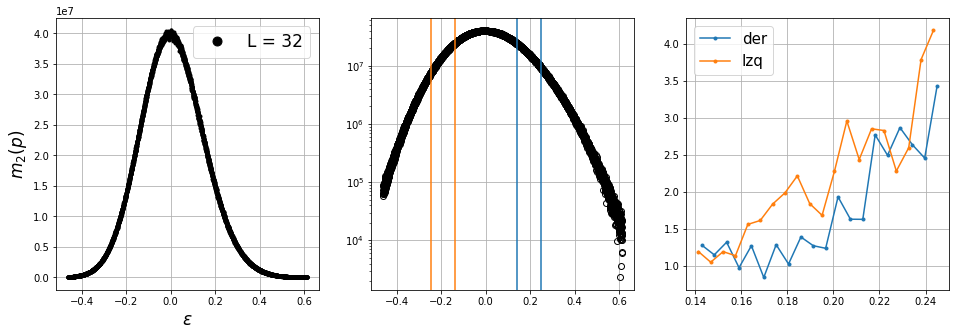

In [47]:
a = 35
b = 32**2
s_32 = np.arange(a,b) # El vector s (que tomando logaritmo es el x que va en la funcion de cuadrados minimos), es siempre el mismo, para todos los p's.
m2_32 = []

for i in range (len(data_32)):
    n_s_32_p = data_32[i,a:b]    
    terminos_m2_32 = []
    for j in range (len(n_s_6_p)):
        terminos_m2_32.append(n_s_32_p[j]*(s_32[j])**2)
    m2_32.append(sum(terminos_m2_32))

    
# Genero vector epsilon   
probs_32 = data_32[:,0]

i_Max_32 = m2_32.index(max(m2_32))

epsilon_32 = (probs_32 - probs_32[i_Max_32])/probs_32[i_Max]# le resto la pc


#############################
#############################
a = 1000
b = 1500
c = 2800
d = 3300

partes = 25
epsilon_der32, gamma_der32, sigma_der32 = GammaMatching(m2_32, epsilon_32, c, d, partes)
epsilon_izq32, gamma_izq32, sigma_izq32 = GammaMatching(m2_32, epsilon_32, a ,b, partes)

#GRÁFICOS
fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (16,5))
# Grafico
axs[0].plot(epsilon_32, m2_32, 'k.',label = 'L = 32');
axs[0].set_xlabel('$\epsilon$',fontsize = 17)
axs[0].set_ylabel('$m_2(p)$', fontsize = 17)
axs[0].grid();
axs[0].legend(fontsize = 17, markerscale = 3);

axs[1].plot(epsilon_32, m2_32, 'ko', fillstyle = 'none')
axs[1].axvline(epsilon_32[a], color=(1,0.498,0.055))
axs[1].axvline(epsilon_32[b], color=(1,0.498,0.055))
axs[1].axvline(epsilon_32[c], color=(0.122,0.467,0.705))
axs[1].axvline(epsilon_32[d], color=(0.122,0.467,0.705))
axs[1].grid()
axs[1].set_yscale('log')

axs[2].plot(epsilon_der32, gamma_der32,'.-', label = 'der')
axs[2].plot(epsilon_izq32, gamma_izq32,'.-', label = 'Izq')
axs[2].legend(fontsize = 15)
axs[2].grid()
#axs[2].axis([0.2, 0.3, -0.2,5])

In [48]:
Gammas32 = np.array([1.133230, 2.490170])
Gamma32 = np.mean(Gammas32)
Gamma_std32 = np.std(Gammas32)
print('El valor de gamma hallado es de gamma = %.3f +\- %.3f' % (Gamma32, Gamma_std32))

El valor de gamma hallado es de gamma = 1.812 +\- 0.678
